In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
def gauss(sig=1,x0=0):
    x = np.linspace(x0-10*sig,x0+10*sig,1000)
    y = 1.0/(np.sqrt(2*np.pi)*sig)*np.exp(-(x-x0)**2/(2*sig**2))
    return x,y

In [3]:
rand = np.random.normal(5,2,100)
print(rand)

[ 3.56941268  6.07798898  5.33893393  4.24506204  6.83368929  8.19786725
  6.43415992  2.04797785  6.42671445  6.22388008  8.39361731  3.99372121
  2.31290291  6.62449629  4.05304413  3.54966255  6.67122724  4.70460355
  4.05475677  5.43863356  7.39855141  4.84510977  4.87422868  9.632955
  5.9188131   4.67596196  0.87209942  2.24566019  8.7415223   3.92771015
  6.59173052  6.3207706   7.24271157  8.38864582  4.18585393  4.41772259
  4.12915696  1.61105603  5.01393328  2.44253986  2.60304455  6.978561
  9.66091156  3.42929798  1.97752127  6.70346011  4.25977269  4.79977517
  8.18394265  5.55840494  6.86474289  9.28324323  5.7328751   5.43270838
  3.11781348  2.68774202  7.72362891  6.00748209  7.19044919  3.79935482
  6.71707882  5.12853386  6.51463093  1.8520194   3.87935406  6.37125122
  2.87289991  6.95301122  6.75412322  3.02803622  2.80497058 -0.7991299
  7.13522042  5.41835864  4.19732962  5.27363225  5.40715987  5.28348633
  8.34780607  5.25379549  7.23108956  0.89232874  3.4343

Averaging distributions: 100%|██████████| 100000/100000 [00:35<00:00, 2830.61dists/s]
/opt/anaconda2/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


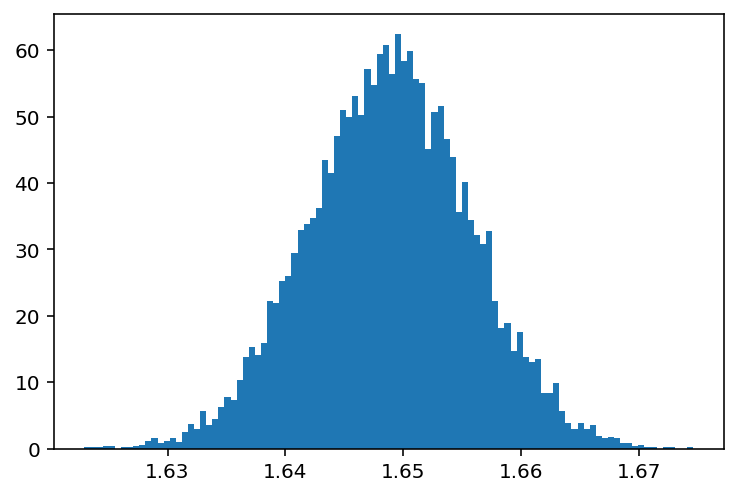

In [4]:
size = 10000

# The number of distributions that we will average
ndist = 100000

# Create an array of zeros and then accumulate the values from each draw.
dist =  np.zeros(size)
pbar = tqdm(desc='Averaging distributions',unit='dists',total=ndist)
for i in range(ndist):
    dist += np.random.lognormal(0,1,size)
    pbar.update(1)
pbar.close()

# Now divide by the number of distributions to find the average values
dist /= np.float(ndist)

# Plot the resultant distribution
hist = plt.hist(dist,bins=100,normed=True,edgecolor='none')

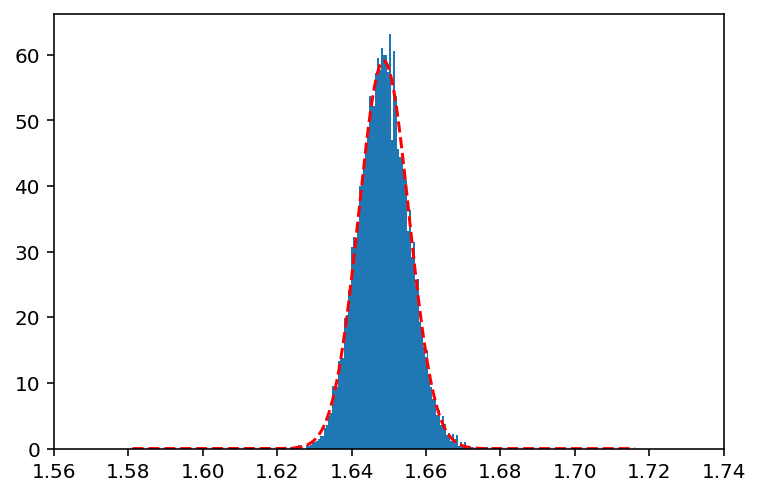

In [6]:
hist = plt.hist(dist,bins=100,normed=True,edgecolor='none')
x,y = gauss(x0=np.mean(dist),sig=np.std(dist))
plt.plot(x,y,'r--')
xlim = plt.xlim(1.56,1.74)

I don't see how this is any different than the original jupyter notebook. You were supposed to pick another asymmetric distribution to average...

4/10